# Project: Investigate `No Show Appointments` Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset preview:
`No show appointments` dataset contains information about 110,527 medical appointments and their 14 associated characteristics.
The most important one is wheather the patient showed up for his apointment or not.

The charactristics associated with each appoinment record are:
   1. Patient Id: identification of a patient
   2. Appointment ID: identification of each appointment
   3. Gender: Male or Female.
   4. Scheduled Day: the day of the actuall appointment.
   5. Appointment Day: the day someone called or registered the appointment.
   6. Age: How old is the patient?
   7. Neighbourhood: the place of the appointment.
   8. Bolsa Família enrollment status: whether the patient is enrolled in the Bolsa Família program or not.
   9. Hypertension: whether the patient has hypertension or not.
   10. Diabetes: whether the patient has diabetes or not
   11. Alcoholism: whether the patient is alcoholic or not
   12. Handcap: whether the patient is handicapped or not
   13. SMS_received: 1 or more messages sent to the patient.
   14. show up status: whether the patient showed up for his apointment or not.

### Project Aim:
Investigate and analyze the dataset to determine the main charactristics associted with showing up in the appointment and vise versa. And hopefully this could help us predict wheather a patient is more likely to show up for his appointment or not?

### Questions:
The following questions are aimed to be answered by the outcome of the analysis:
   - What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
   - do the Bolsa Família program associates seem to have better commetment than those who are not part of it?
   - is having a certain disease associated with better coomettment?
   - what gender is associated with better committment?
   - does the number of sms sent to the patient increases the probality of him showing up in his appointment?
   - is there association between duration between scadualed date and appointment date and the committment of the patient?


<a id='wrangling'></a>
## Data Wrangling

### Gather:

In [1]:
#import necessary libraries and packages
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load data from the csv file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


### Assess:

In [3]:
# visual assessment
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# display concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# display summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# display random sample of five records
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
109974,1.725466e+13,5766974,F,2016-06-02T16:08:13Z,2016-06-06T00:00:00Z,71,MARIA ORTIZ,0,0,0,0,0,1,No
87804,9.724613e+14,5698364,F,2016-05-16T07:30:34Z,2016-06-07T00:00:00Z,85,ARIOVALDO FAVALESSA,0,0,0,0,0,1,No
109196,7.834418e+13,5713037,M,2016-05-18T09:38:33Z,2016-06-07T00:00:00Z,25,SANTO ANTÔNIO,0,0,0,0,0,0,No
21859,8.524478e+13,5624651,F,2016-04-26T16:39:04Z,2016-05-03T00:00:00Z,69,DO CABRAL,0,1,1,0,0,1,Yes
2226,9.565252e+11,5632759,M,2016-04-28T08:24:38Z,2016-04-29T00:00:00Z,35,CONSOLAÇÃO,0,1,0,0,0,0,No


In [7]:
# detect if there is any duplicates in patient_id column
df.PatientId.value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
                ..
1.222828e+13     1
6.821231e+11     1
7.163981e+14     1
9.798964e+14     1
2.724571e+11     1
Name: PatientId, Length: 62299, dtype: int64

In [8]:
# detect duplicates in appointment id column
df.AppointmentID.value_counts()

5769215    1
5731652    1
5707080    1
5702986    1
5715276    1
          ..
5586290    1
5584243    1
5598584    1
5602682    1
5771266    1
Name: AppointmentID, Length: 110527, dtype: int64

In [9]:
# display duplicated values in patient Id column
df[df.PatientId.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27,1.215484e+13,5628345,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
154,1.925263e+10,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
288,2.246214e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
290,7.222383e+12,5566070,M,2016-04-11T09:50:18Z,2016-04-29T00:00:00Z,7,CARATOÍRA,0,0,0,0,0,1,No
316,1.756579e+13,5582867,F,2016-04-14T10:01:09Z,2016-04-29T00:00:00Z,1,JOANA D´ARC,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [10]:
# display value counts for ScheduledDay column
df.ScheduledDay.value_counts()

2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-04-28T11:20:26Z     1
2016-04-25T16:48:30Z     1
2016-05-18T14:24:21Z     1
2016-05-19T08:57:47Z     1
2016-05-24T11:34:23Z     1
Name: ScheduledDay, Length: 103549, dtype: int64

In [11]:
# sort age values 
df.Age.sort_values()

99832      -1
34218       0
102834      0
102832      0
102830      0
         ... 
63915     115
76284     115
68127     115
63912     115
97666     115
Name: Age, Length: 110527, dtype: int64

#### Quality:
- nondescribtive column names(scholarsip, no-show).
- hard to understand values in the no show column.
- Patient id is a float.
- inacurate values in `AppointmentDay` (according to the dataset describtion the appointment date should be before or the same as ScheduledDay not after it)
- Erroneous datatypes (PatientId, Gender, scolarship, ScheduledDay, AppointmentDay hipertension, diabetes, alcoholism, handcap, sms_received and attendance_status columns)
- Inaccurate minimum age value
- duplicated records
- drop inaccurate values in handicapped column

#### Tidiness
- should be split into paient and appointment tables ***(better left as it is for the sake of this analysis)***

### Clean

In [12]:
# make a copy of the data frame to perform cleaning tasks on it while leaving the original intact
df_clean = df.copy()

#### nondescribtive column names(scholarsip, no-show)

#### define:
- change the `scholarship` column header to be `bolsa_familia_enrollment_status`, change the `no-show` column header to be `attendance_status`, separate the 2-word column headers with (_)
- change the columnn headers to be all lower case to make working with them easier

#### clean:

In [13]:
# rename columns to make working with them easier
df_clean.rename(columns={'Scholarship':'bolsa_familia_enrollment_status',
                         'No-show': 'attendance_status', 
                         'ScheduledDay': 'scheduled_day', 
                         'AppointmentDay':'appointment_day', 
                         'PatientId': 'patient_id', 
                         'AppointmentID': 'appointment_id'}, inplace=True)
df_clean.rename(columns=lambda x: x.lower(), inplace=True)

#### test:

In [14]:
# confirm that the renaming worked
df_clean.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,bolsa_familia_enrollment_status,hipertension,diabetes,alcoholism,handcap,sms_received,attendance_status
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### hard to understand values in the no show column

#### define:
- change all the `No` values in the `attendance_status` column to `show` and change the `yes` values to `no show`

#### clean:

In [15]:
# decode the attendance status values to make them more clear
df_clean.attendance_status = df_clean.attendance_status.replace('No', 'Show')
df_clean.attendance_status = df_clean.attendance_status.replace('Yes', 'No show')

#### test:

In [16]:
# confirm the decoding worked
df_clean.attendance_status.unique()

array(['Show', 'No show'], dtype=object)

#### Erroneous datatypes (PatientId, Gender, ScheduledDay, and AppointmentDay columns)

#### define:
- change `patient_id` values from float to string, `gender` from string to categorical and `scheduled_day` and `appointment_day` from string to datetime objects. 

#### clean:

In [17]:
# change the patient id column data type from float to string
df_clean.patient_id = df_clean.patient_id.astype(str).str.replace('.', '')

In [18]:
# change the gender column data type from string to categorical
df_clean.gender = df_clean.gender.astype('category')

In [19]:
# change the scheduled and appointment day data types from string to datetime objects
df_clean.scheduled_day = pd.to_datetime(df_clean.scheduled_day)
df_clean.appointment_day = pd.to_datetime(df_clean.appointment_day)

#### test:

In [20]:
# confirm the data types changed successfully
df_clean.dtypes

patient_id                                      object
appointment_id                                   int64
gender                                        category
scheduled_day                      datetime64[ns, UTC]
appointment_day                    datetime64[ns, UTC]
age                                              int64
neighbourhood                                   object
bolsa_familia_enrollment_status                  int64
hipertension                                     int64
diabetes                                         int64
alcoholism                                       int64
handcap                                          int64
sms_received                                     int64
attendance_status                               object
dtype: object

In [21]:
df_clean.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,bolsa_familia_enrollment_status,hipertension,diabetes,alcoholism,handcap,sms_received,attendance_status
0,298724998242960,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Show


#### Inaccurate minimum age value

#### define:
- drop the record with the inaccurate value

#### clean

In [22]:
# drop the inaccurta age value
df_clean.drop(index=df_clean.query('age == -1').index, inplace=True)

#### test:

In [23]:
# confirm the value was dropped
df_clean.query('age == -1')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,bolsa_familia_enrollment_status,hipertension,diabetes,alcoholism,handcap,sms_received,attendance_status


In [24]:
df_clean.age.min()

0

#### inacurate values in `AppointmentDay` (according to the dataset describtion the appointment date should be before or the same as ScheduledDay not after it)

#### define:
-  create new `waiting_days` column from the differences between `scheduled_day` and `appointment_day` as per dataset creator suggestion.

#### clean:

In [25]:
# create new column called waiting_days to display difference between scheduled_day and appointment_day
df_clean['waiting_days'] = (abs(df_clean.scheduled_day - df_clean.appointment_day).dt.days).astype('int64')

#### test:

In [26]:
# testing the column was created successfully
'waiting_days' in df_clean.columns

True

In [27]:
# display random sample from the new column
df_clean.waiting_days.sample(5)

6751     13
30765     0
7642      0
77317    24
9664      0
Name: waiting_days, dtype: int64

#### drop inaccurate values in handicapped column
#### Define:
- drop rows that contain handicapped value more than 1

#### Clean:

In [28]:
df_clean.drop(index=df_clean.query('handcap > 1').index, inplace=True)

#### Test:

In [29]:
df_clean.query('handcap > 1')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,bolsa_familia_enrollment_status,hipertension,diabetes,alcoholism,handcap,sms_received,attendance_status,waiting_days


#### Define:
- Decode values in bolsa_familia_enrollment_status,	hipertension,	diabetes,	alcoholism,	handcap,	sms_received
#### Clean

In [30]:
df_clean.bolsa_familia_enrollment_status = (df_clean.bolsa_familia_enrollment_status.replace(0, 'Not Enrolled')).astype('category')
df_clean.bolsa_familia_enrollment_status = (df_clean.bolsa_familia_enrollment_status.replace(1, 'Enrolled')).astype('category')

In [31]:
df_clean.hipertension = (df_clean.hipertension.replace(0, 'Non-Hypertensive')).astype('category')
df_clean.hipertension = (df_clean.hipertension.replace(1, 'Hypertensive')).astype('category')

In [32]:
df_clean.diabetes = (df_clean.diabetes.replace(0, 'Non-Diabetic')).astype('category')
df_clean.diabetes = (df_clean.diabetes.replace(1, 'Diabetic')).astype('category')

In [33]:
df_clean.alcoholism = (df_clean.alcoholism.replace(0, 'Non-Alcholic')).astype('category')
df_clean.alcoholism = (df_clean.alcoholism.replace(1, 'Alcholic')).astype('category')

In [34]:
df_clean.handcap = (df_clean.handcap.replace(0, 'Non-Handicapped')).astype('category')
df_clean.handcap = (df_clean.handcap.replace(1, 'Handicapped')).astype('category')

In [35]:
df_clean.sms_received = (df_clean.sms_received.replace(0, 'No SMS Received')).astype('category')
df_clean.sms_received = (df_clean.sms_received.replace(1, 'SMS Received')).astype('category')

#### Test:

In [36]:
print(df_clean.bolsa_familia_enrollment_status.unique())
print(df_clean.hipertension.unique())
print(df_clean.diabetes.unique())
print(df_clean.alcoholism.unique())
print(df_clean.handcap.unique())
print(df_clean.sms_received.unique())

[Not Enrolled, Enrolled]
Categories (2, object): [Not Enrolled, Enrolled]
[Hypertensive, Non-Hypertensive]
Categories (2, object): [Hypertensive, Non-Hypertensive]
[Non-Diabetic, Diabetic]
Categories (2, object): [Non-Diabetic, Diabetic]
[Non-Alcholic, Alcholic]
Categories (2, object): [Non-Alcholic, Alcholic]
[Non-Handicapped, Handicapped]
Categories (2, object): [Non-Handicapped, Handicapped]
[No SMS Received, SMS Received]
Categories (2, object): [No SMS Received, SMS Received]


#### duplicated records

#### define:
- check for the records with the same values in all the variables except the appointment id
- drop these duplicates

#### clean:

In [37]:
# extract apointment year, month and day
df_clean['appointmen_year'] = (df_clean['appointment_day'].dt.year).astype('category')
df_clean['appointmen_month'] = (df_clean['appointment_day'].dt.month).astype('category')
df_clean['appoint_day'] = (df_clean['appointment_day'].dt.day).astype('category')

In [38]:
# extract scheduled year, month, day and hour
df_clean['scheduled_year'] = (df_clean['scheduled_day'].dt.year).astype('category')
df_clean['scheduled_month'] = (df_clean['scheduled_day'].dt.month).astype('category')
df_clean['aschedul_day'] = (df_clean['scheduled_day'].dt.day).astype('category')
df_clean['scheduled_hour'] = (df_clean['scheduled_day'].dt.hour).astype('category')

In [39]:
# drop unnecessary columns
df_clean.drop(columns=['appointment_id', 'scheduled_day', 'appointment_day'], inplace=True)

In [40]:
# check for duplicated records
df_clean[df_clean.duplicated()]

,patient_id,gender,age,neighbourhood,bolsa_familia_enrollment_status,hipertension,diabetes,alcoholism,handcap,sms_received,attendance_status,waiting_days,appointmen_year,appointmen_month,appoint_day,scheduled_year,scheduled_month,aschedul_day,scheduled_hour
154,192526348650,F,30,ITARARÉ,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,28,16
369,4341599877982240,F,39,PRAIA DO CANTO,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,9
371,44974151160,F,11,BELA VISTA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,9,2016,4,29,2016,4,19,11
436,26167162243170,F,9,MARIA ORTIZ,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,9
466,51612391329680,F,49,CONSOLAÇÃO,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,1,2016,4,29,2016,4,27,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109770,3126132489638890,M,45,TABUAZEIRO,Not Enrolled,Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,1,2016,6,1,2016,5,30,8
110381,7541776722730,M,21,RESISTÊNCIA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,6,1,2016,6,1,7
110467,768233338841510,M,1,RESISTÊNCIA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,6,7,2016,6,7,11
110472,312419544753180,M,1,NOVA PALESTINA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,6,7,2016,6,7,8


In [41]:
# drop the duplicated records
df_clean.drop_duplicates(inplace=True)

#### test:

In [42]:
# confirm the duplicated records are successfully dropped
df_clean[df_clean.duplicated()]

,patient_id,gender,age,neighbourhood,bolsa_familia_enrollment_status,hipertension,diabetes,alcoholism,handcap,sms_received,attendance_status,waiting_days,appointmen_year,appointmen_month,appoint_day,scheduled_year,scheduled_month,aschedul_day,scheduled_hour


In [43]:
# confirm there is no more duplicates
sum(df_clean.duplicated())

0

In [44]:
# visual assessment for the first 30 record
df_clean.head(30)

,patient_id,gender,age,neighbourhood,bolsa_familia_enrollment_status,hipertension,diabetes,alcoholism,handcap,sms_received,attendance_status,waiting_days,appointmen_year,appointmen_month,appoint_day,scheduled_year,scheduled_month,aschedul_day,scheduled_hour
0,298724998242960,F,62,JARDIM DA PENHA,Not Enrolled,Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,18
1,5589977766944380,M,56,JARDIM DA PENHA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,16
2,42629622999510,F,62,MATA DA PRAIA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,16
3,8679512131740,F,8,PONTAL DE CAMBURI,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,17
4,88411864481830,F,56,JARDIM DA PENHA,Not Enrolled,Hypertensive,Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,16
5,959851332312740,F,76,REPÚBLICA,Not Enrolled,Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,1,2016,4,29,2016,4,27,8
6,7336881644766610,F,23,GOIABEIRAS,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,No show,1,2016,4,29,2016,4,27,15
7,34498333941230,F,39,GOIABEIRAS,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,No show,1,2016,4,29,2016,4,27,15
8,563947299499720,F,21,ANDORINHAS,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,8
9,781245643692970,F,19,CONQUISTA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,1,2016,4,29,2016,4,27,12


## Reassessment needed

***through visual assessment for the first 30 record it appeared that the records with index 21 and 27 are almost identical except for the attendance status where one of them did show up and one didin't which is impossible so it was clearly that further assessment is needed to see if there are similar cases or if it is just one off occurrences*** 

In [45]:
# create a copy of df_clean data frame to use it in the assessment since the attendance status is the dependent variable
# and we can't remove it from our original data frame
df_clean_copy = df_clean.copy()

In [46]:
# drop the attendance ststus column from the copy
df_clean_copy.drop(columns=['attendance_status'], inplace=True)

In [47]:
# check for duplicated records
df_clean_copy[df_clean_copy.duplicated(keep = False)]

,patient_id,gender,age,neighbourhood,bolsa_familia_enrollment_status,hipertension,diabetes,alcoholism,handcap,sms_received,waiting_days,appointmen_year,appointmen_month,appoint_day,scheduled_year,scheduled_month,aschedul_day,scheduled_hour
21,121548437528350,F,4,CONQUISTA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,1,2016,4,29,2016,4,27,10
27,121548437528350,F,4,CONQUISTA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,1,2016,4,29,2016,4,27,10
209,3252769131396630,F,47,SANTOS DUMONT,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,2,2016,4,29,2016,4,26,18
1531,3979297573890,F,47,TABUAZEIRO,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,0,2016,4,29,2016,4,29,12
1541,3979297573890,F,47,TABUAZEIRO,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,0,2016,4,29,2016,4,29,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108298,72927467484210,F,18,ROMÃO,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,0,2016,6,2,2016,6,2,12
109547,222866159419460,M,10,CRUZAMENTO,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,1,2016,6,1,2016,5,30,7
109555,222866159419460,M,10,CRUZAMENTO,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,1,2016,6,1,2016,5,30,7
110368,878879151164380,F,59,RESISTÊNCIA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,33,2016,6,8,2016,5,5,15


***After the reassessment it appeared that the noticable issue is not one off ocurrences and since we can't drop the attendance status since it's our dependent variable and we can't know for sure weather the patient showed up or not so it appeares that the most appropriate fix is to drop these records in both cases either it showed up or not***

#### define:
- drop the duplicated records 

#### clean

In [48]:
# get indexes of duplicated record 
df_duplicates_indexes= df_clean_copy[df_clean_copy.duplicated(keep = False)].index

In [49]:
#drop duplicated rows
df_clean.drop(index = df_duplicates_indexes, inplace=True)

#### test:

In [50]:
# confirm the duplicated rows were dropped successfully
df_clean.head(30)

,patient_id,gender,age,neighbourhood,bolsa_familia_enrollment_status,hipertension,diabetes,alcoholism,handcap,sms_received,attendance_status,waiting_days,appointmen_year,appointmen_month,appoint_day,scheduled_year,scheduled_month,aschedul_day,scheduled_hour
0,298724998242960,F,62,JARDIM DA PENHA,Not Enrolled,Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,18
1,5589977766944380,M,56,JARDIM DA PENHA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,16
2,42629622999510,F,62,MATA DA PRAIA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,16
3,8679512131740,F,8,PONTAL DE CAMBURI,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,17
4,88411864481830,F,56,JARDIM DA PENHA,Not Enrolled,Hypertensive,Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,16
5,959851332312740,F,76,REPÚBLICA,Not Enrolled,Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,1,2016,4,29,2016,4,27,8
6,7336881644766610,F,23,GOIABEIRAS,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,No show,1,2016,4,29,2016,4,27,15
7,34498333941230,F,39,GOIABEIRAS,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,No show,1,2016,4,29,2016,4,27,15
8,563947299499720,F,21,ANDORINHAS,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,4,29,2016,4,29,8
9,781245643692970,F,19,CONQUISTA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,1,2016,4,29,2016,4,27,12


In [51]:
df_clean.shape

(107796, 19)

In [52]:
df_clean.age.describe()

count    107796.000000
mean         37.133883
std          23.107666
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [53]:
df_clean.query('age > 100')

,patient_id,gender,age,neighbourhood,bolsa_familia_enrollment_status,hipertension,diabetes,alcoholism,handcap,sms_received,attendance_status,waiting_days,appointmen_year,appointmen_month,appoint_day,scheduled_year,scheduled_month,aschedul_day,scheduled_hour
58014,9762947997754390,F,102,CONQUISTA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,5,3,2016,5,3,9
63912,319632116139810,F,115,ANDORINHAS,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Handicapped,No SMS Received,No show,2,2016,5,19,2016,5,16,9
68127,319632116139810,F,115,ANDORINHAS,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Handicapped,No SMS Received,No show,37,2016,5,16,2016,4,8,14
76284,319632116139810,F,115,ANDORINHAS,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Handicapped,No SMS Received,Show,0,2016,5,30,2016,5,30,9
90372,2342835965480,F,102,MARIA ORTIZ,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,1,2016,6,2,2016,5,31,10
97666,7482345792447240,F,115,SÃO JOSÉ,Not Enrolled,Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,SMS Received,Show,14,2016,6,3,2016,5,19,7


In [54]:
df_clean.columns

Index(['patient_id', 'gender', 'age', 'neighbourhood',
       'bolsa_familia_enrollment_status', 'hipertension', 'diabetes',
       'alcoholism', 'handcap', 'sms_received', 'attendance_status',
       'waiting_days', 'appointmen_year', 'appointmen_month', 'appoint_day',
       'scheduled_year', 'scheduled_month', 'aschedul_day', 'scheduled_hour'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

In [55]:
base_color = sns.color_palette()[0]

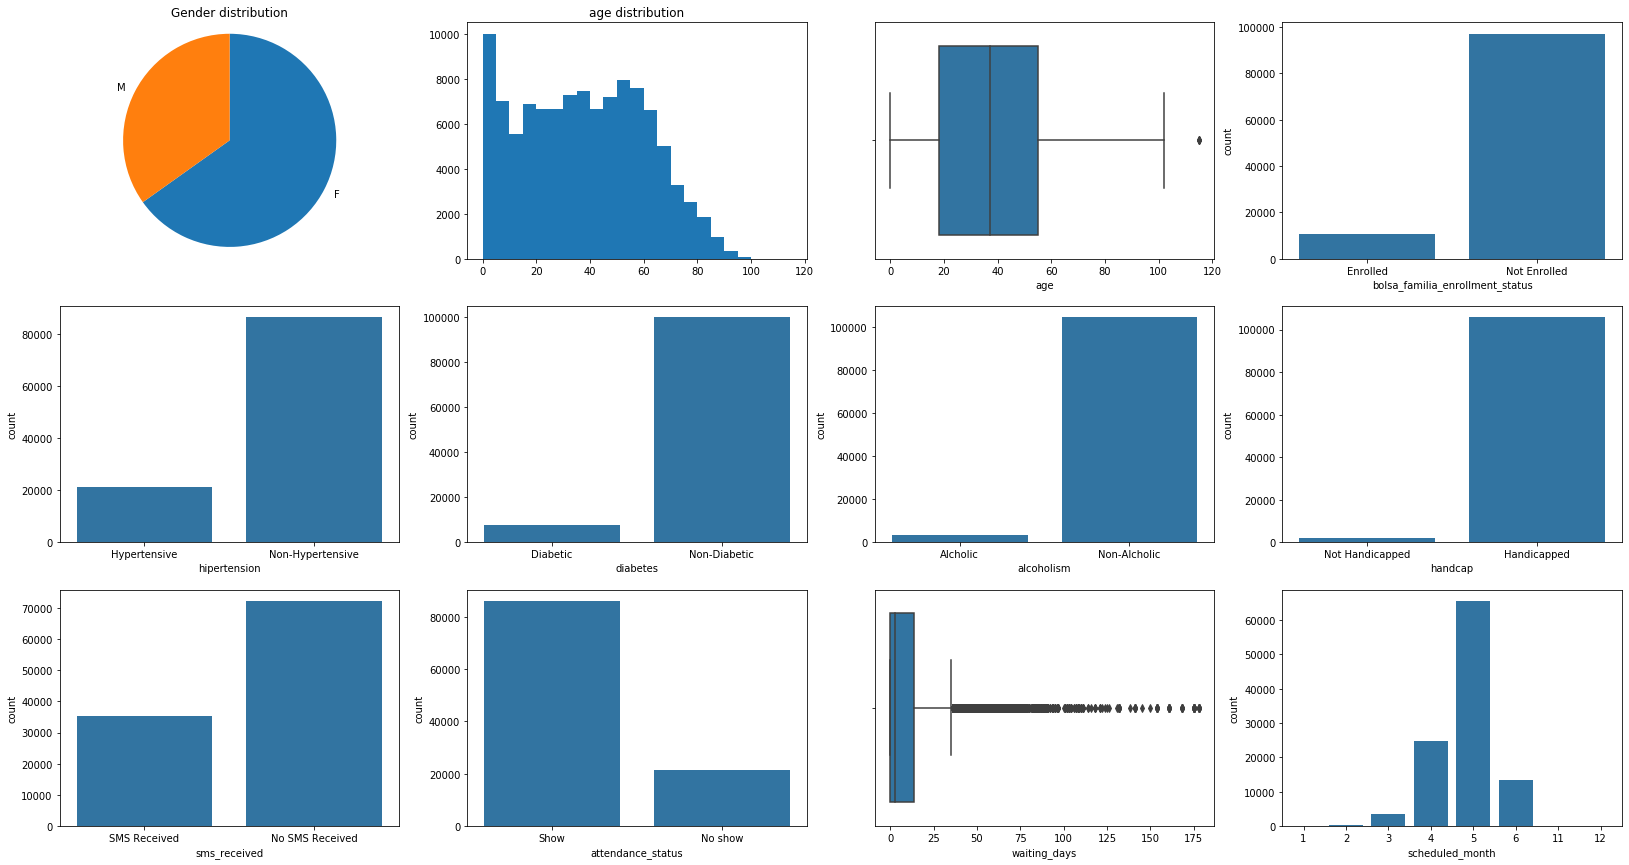

In [56]:
# plot all the data set variables to show a quick summary
plt.figure(figsize = [28, 20]) # larger figure size for subplots

plt.subplot(4, 4, 1) 
sorted_counts = df_clean['gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.title('Gender distribution')
plt.axis('square');

plt.subplot(4, 4, 2)
bin_edges = np.arange(0, df_clean['age'].max()+5, 5)
plt.hist(data = df_clean, x = 'age', bins = bin_edges);
plt.title('age distribution')

plt.subplot(4, 4, 3) 
sns.boxplot(data = df_clean, x = 'age', color = base_color);

plt.subplot(4, 4, 4)
sns.countplot(data = df_clean, x='bolsa_familia_enrollment_status', color = base_color);

plt.subplot(4, 4, 5)
sns.countplot(data = df_clean, x='hipertension', color = base_color);
       
plt.subplot(4, 4, 6)
sns.countplot(data = df_clean, x='diabetes', color = base_color);

plt.subplot(4, 4, 7)
sns.countplot(data = df_clean, x='alcoholism', color = base_color);

plt.subplot(4, 4, 8)
sns.countplot(data = df_clean, x='handcap', color = base_color);
plt.xticks([0, 1], ['Not Handicapped', 'Handicapped']);

plt.subplot(4, 4, 9)
sns.countplot(data = df_clean, x='sms_received', color = base_color);

plt.subplot(4, 4, 10)
sns.countplot(data = df_clean, x='attendance_status', color = base_color);

plt.subplot(4, 4, 11) 
sns.boxplot(data = df_clean, x = 'waiting_days', color = base_color);

plt.subplot(4, 4, 12)
sns.countplot(data = df_clean, x='scheduled_month', color = base_color);

#### define:
- detect outliers in age days columns
- drop the records with outliers

#### clean:

In [57]:
# detect rows with outliers in age column
df_clean.query('age > 100')

,patient_id,gender,age,neighbourhood,bolsa_familia_enrollment_status,hipertension,diabetes,alcoholism,handcap,sms_received,attendance_status,waiting_days,appointmen_year,appointmen_month,appoint_day,scheduled_year,scheduled_month,aschedul_day,scheduled_hour
58014,9762947997754390,F,102,CONQUISTA,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,0,2016,5,3,2016,5,3,9
63912,319632116139810,F,115,ANDORINHAS,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Handicapped,No SMS Received,No show,2,2016,5,19,2016,5,16,9
68127,319632116139810,F,115,ANDORINHAS,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Handicapped,No SMS Received,No show,37,2016,5,16,2016,4,8,14
76284,319632116139810,F,115,ANDORINHAS,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Handicapped,No SMS Received,Show,0,2016,5,30,2016,5,30,9
90372,2342835965480,F,102,MARIA ORTIZ,Not Enrolled,Non-Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,No SMS Received,Show,1,2016,6,2,2016,5,31,10
97666,7482345792447240,F,115,SÃO JOSÉ,Not Enrolled,Hypertensive,Non-Diabetic,Non-Alcholic,Non-Handicapped,SMS Received,Show,14,2016,6,3,2016,5,19,7


In [58]:
# drop outliered records
df_clean.drop(index=df_clean.query('age > 100').index, inplace=True)

#### test:

In [59]:
# check the rows were successfully dropped
df_clean.query('age > 100')

,patient_id,gender,age,neighbourhood,bolsa_familia_enrollment_status,hipertension,diabetes,alcoholism,handcap,sms_received,attendance_status,waiting_days,appointmen_year,appointmen_month,appoint_day,scheduled_year,scheduled_month,aschedul_day,scheduled_hour


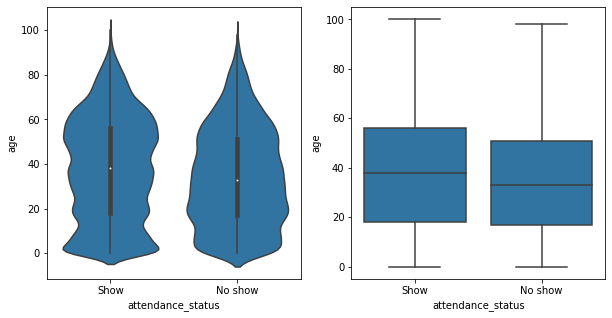

In [60]:
# plot relationship between age and attendance status 
plt.figure(figsize = [10, 5])

# left plot: violin plot
plt.subplot(1, 2, 1)
sns.violinplot(data = df_clean , x = 'attendance_status', y = 'age', color = base_color);

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df_clean , x = 'attendance_status', y = 'age', color = base_color);

In [61]:
def num_show_prob(dataframe , col_name):
    df = pd.crosstab(index = dataframe[col_name], columns = dataframe.attendance_status).reset_index()
    df['prob_show'] = df['Show'] / (df['Show'] + df['No show'])
    return df[[col_name, 'prob_show']]

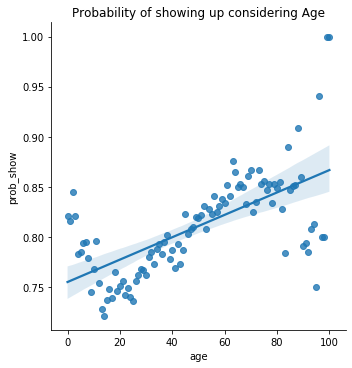

In [62]:
sns.lmplot(data = num_show_prob(df_clean, 'age'), x = 'age', y = 'prob_show', fit_reg = True)
plt.title('Probability of showing up considering Age');

### Insight:
**Patients between 15 and 40 years seems to miss their appointments more** 

**Probability of shwing up to the appointments seems correllated with age**

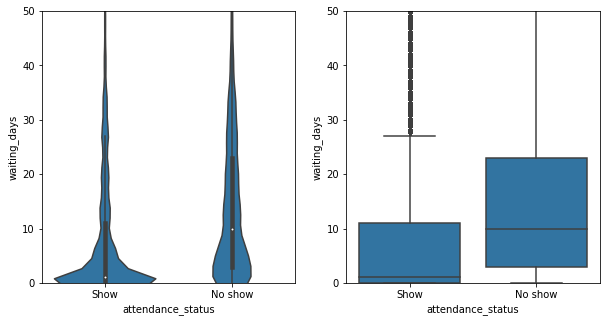

In [63]:
# plot relationship between waiting days and attendance status 
plt.figure(figsize = [10, 5])

# left plot: violin plot
plt.subplot(1, 2, 1)
sns.violinplot(data = df_clean , x = 'attendance_status', y = 'waiting_days', color = base_color)
plt.ylim(0, 50);

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df_clean , x = 'attendance_status', y = 'waiting_days', color = base_color)
plt.ylim(0, 50);

### Insight
**Patients who had 10 days between their appointment and schadualed day seems to have higher chance to show up for their appointment**

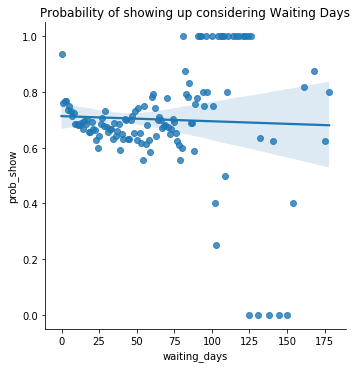

In [64]:
sns.lmplot(data = num_show_prob(df_clean, 'waiting_days'), x = 'waiting_days', 
           y = 'prob_show', fit_reg = True)
plt.title('Probability of showing up considering Waiting Days');

In [65]:
def show_prob(col_name):
    """
    take acolumn name as an argument and return data frame with the values associated with
    the probability of showing up to the appointment regarding the values of the column name
    """
    probs = []
    for value in df_clean[col_name].unique():
        denominator = len(df_clean[df_clean[col_name] == value])
        n = len(df_clean[(df_clean[col_name] == value) & (df_clean.attendance_status == 'Show')])
        prob = n/ denominator
        show_prob = {'Value': value, 'Probability': prob}
        probs.append(show_prob)
    return pd.DataFrame(probs)

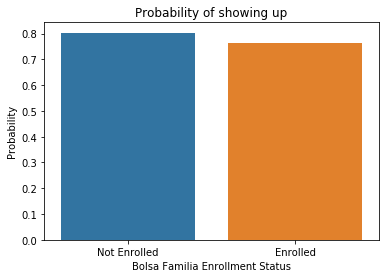

In [66]:
sns.barplot(data = show_prob('bolsa_familia_enrollment_status'),
            x = 'Value', y = 'Probability')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.xlabel('Bolsa Familia Enrollment Status');

### Insight
- surprisengly the enrollment in the Bolsa Familia program has slightley negative effect on patient committment

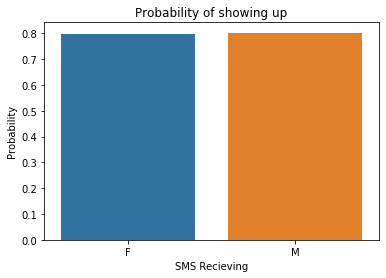

In [67]:
sns.barplot(data = show_prob('gender'),
            x = 'Value', y = 'Probability')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.xlabel('SMS Recieving');

### Insight
- Despite that the number of females is larger than the males the probability of showing is almost the same for both genders.

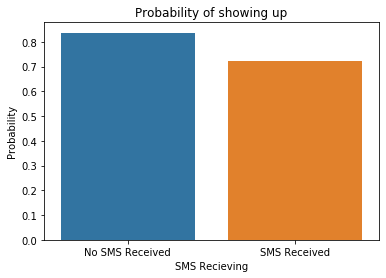

In [68]:
sns.barplot(data = show_prob('sms_received'),
            x = 'Value', y = 'Probability')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.xlabel('SMS Recieving');

### Insight
- surprisengly the SMS reminder has slightly negative effect on patient committment

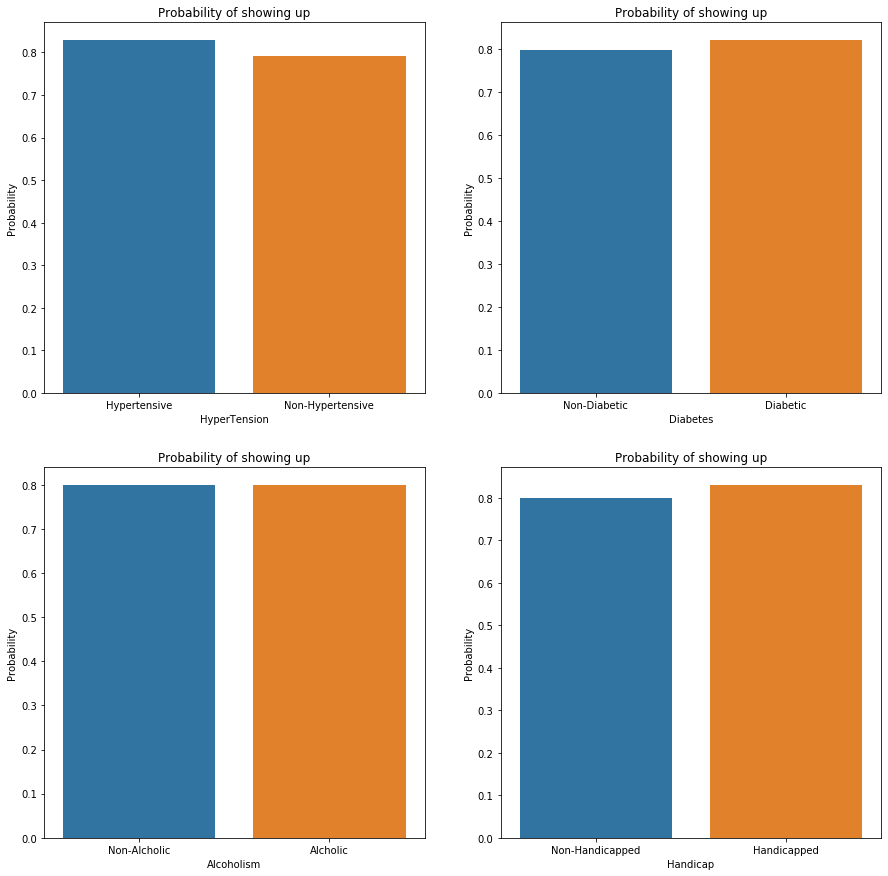

In [69]:
plt.figure(figsize = [15, 15])

# plot hypertension probabilities
plt.subplot(2, 2, 1)
sns.barplot(data = show_prob('hipertension'),
            x = 'Value', y = 'Probability')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.xlabel('HyperTension');

# plot diabetes probabilities
plt.subplot(2, 2, 2)
sns.barplot(data = show_prob('diabetes'),
            x = 'Value', y = 'Probability')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.xlabel('Diabetes');

# plot alcoholism probabilities
plt.subplot(2, 2, 3)
sns.barplot(data = show_prob('alcoholism'),
            x = 'Value', y = 'Probability')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.xlabel('Alcoholism');

# plot handicapped probabilities
plt.subplot(2, 2, 4)
sns.barplot(data = show_prob('handcap'),
            x = 'Value', y = 'Probability')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.xlabel('Handicap');

### Insight 
**Having certain medical conditions increases the probability of patient showing up to his appointment but the imact isn't too large**

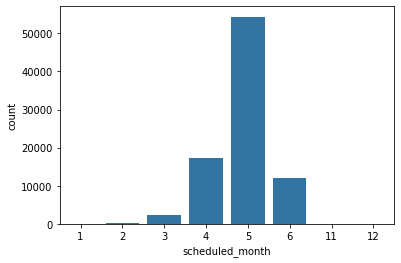

In [70]:
# get month with highest showing count
sns.countplot(data = df_clean.query('attendance_status == "Show"'), x = 'scheduled_month', color= base_color);

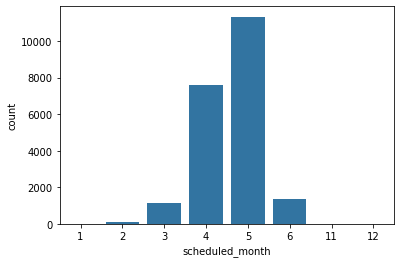

In [71]:
# get month with highest non showing count
sns.countplot(data = df_clean.query('attendance_status == "No show"'), x = 'scheduled_month', color= base_color);

<a id='conclusions'></a>
## Conclusions

**Based on the Expolratory visualizations it appered that**
- The important factors in predctions is age, associated disease and waiting days
- The enrollment in the Bolsa Família program surprisingly had negative effect on the probability of showing up for the appointment
- Having medical conditions does affect the committment of patients but the impact isn't very large
- Although the number of females who show up for their appointment is larger than males they seem to have equal probability of showing up
- The SMSs surprisingly had Negative effect on the probability of showing up
- The more the number of waiting days between making the appointment and the actaual appointment day the less likely that the patient would show up
- older ages has relatively better committment rates.
- May has the highest numbers of appointments.

The resources helped me in the submission are:
- Nano-degree materials
- Libraries documentations